In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('/Users/mehakklunkar/Downloads/ML Study Material/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Categorical to Numerical:**

In [4]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [5]:
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

In [6]:
X = df.drop('charges', axis=1)
y = df['charges']

In [7]:
X

,age,sex,bmi,children,smoker,region
0,-1.438764,0,-0.453320,-0.908614,1,3
1,-1.509965,1,0.509621,-0.078767,0,2
2,-0.797954,1,0.383307,1.580926,0,2
3,-0.441948,1,-1.305531,-0.908614,0,1
4,-0.513149,1,-0.292556,-0.908614,0,1
...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,1
1334,-1.509965,0,0.206139,-0.908614,0,0
1335,-1.509965,0,1.014878,-0.908614,0,2
1336,-1.296362,0,-0.797813,-0.908614,0,3


**Multicollinearity:**

In [8]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

    feature       VIF
0       age  1.014513
1       sex  1.566982
2       bmi  1.022282
3  children  1.002043
4    smoker  1.207526
5    region  1.573703


In [9]:
lin_reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lin_reg.predict(X_test)

**Evaluation Metrics:**

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

rss = np.sum(np.square(y_test - y_pred))
explained_variance = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')
print(f'RSS: {rss}')
print(f'Explained Variance Score: {explained_variance}')

MAE: 4186.508898366432
MSE: 33635210.431178406
RMSE: 5799.587091438356
R-squared: 0.7833463107364539
Adjusted R-squared: 0.7823696599959721
RSS: 9014236395.555813
Explained Variance Score: 0.7833463107364539


**Feature Coefficients:**

In [12]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lin_reg.coef_
})

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values(by='Abs_Coefficient', ascending=False, inplace=True)
print(coefficients)

    Feature   Coefficient  Abs_Coefficient
4    smoker  23647.818096     23647.818096
0       age   3610.280430      3610.280430
2       bmi   2046.892957      2046.892957
3  children    512.253132       512.253132
5    region   -271.284266       271.284266
1       sex    -18.791457        18.791457


*Inference:*<br>
*-Smoking status has the highest coefficient, which significantly increases the cost.*

**Visualization:**

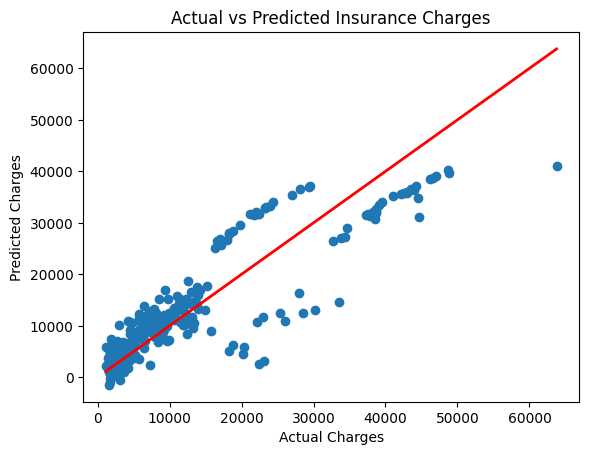

In [13]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

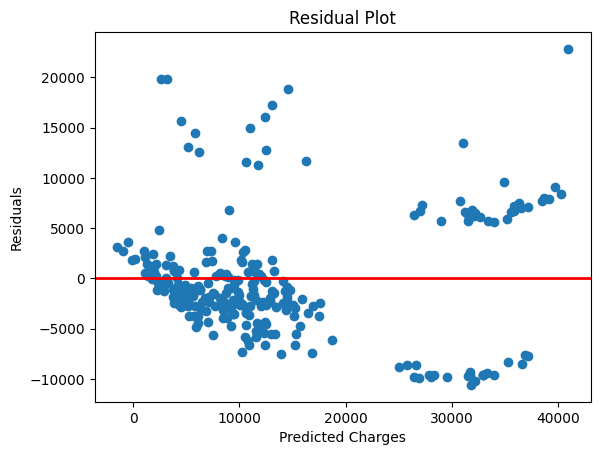

In [14]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show

**Overall Inference:**<br>
*-The model performs reasonably well, explaining 78.3% of the variability in medical insurance charges.*<br>
*-The close match between the R² and adjusted R² scores suggests that the features used in the model are relevant and have predictive value.*<br>
*-There is still some room for improvement, either by refining the model (e.g., using more complex models or feature engineering) or by identifying additional relevant features.*
